<h2>Introducción</h2>

<div> 
<p>Durante las últimas décadas se ha podido observar una creciente preocupación a nivel mundial respecto a la forma en la cual los países consumen y producen su energía. Esta **preocupación** nace gracias a la estrecha relación que existe entre las diversas maneras de obtener este recurso y el impacto que tienen en el medio ambiente. Es por ello por lo cual se crearon las matrices energéticas, ya que permiten analizar y comprender la forma en la cual se distribuyen las diferentes formas de energía utilizada por una región.</p>

<p>Una matriz energética es el conjunto de fuentes de obtención primaria de la energía que se utiliza en el día a día en una región geográfica y en un tiempo determinados. Estas matrices no solo se limitan a enumerar las fuentes empleadas, ya que estas expresan cuanta energía aporta cada una de estas fuentes porcentualmente. Incluso, en muchas ocasiones se hace la distinción respecto a si el origen de la energía es renovable o no.</p>

<p>En este último punto se encuentra la importancia de las matrices energéticas. Se ha comprobado que la huella ecológica que genera un país en la mayoría de las ocasiones es directamente proporcional al porcentaje de energía proveniente de fuentes no renovables que usa. Por lo cual, el poder determinar la proporción entre las diferentes fuentes de energía provee información importante para saber cuáles de estas son las que podrían estar generando un mayor daño ambiental. </p>

<p>Para determinar la matriz energética se recolectan todos los datos correspondientes a la generación de energía a partir de fuentes primarias en un contexto predeterminado, después de esto, se clasifica cada uno de los datos obtenidos para determinar a cuál fuente primaria corresponden. En función de lo anterior, se realiza la suma del total de energía obtenida y se determina a cuál proporción del total corresponden cada una de las fuentes.</p>

<p>Para recolectar los datos necesarios para determinar una matriz energética se necesita un monitoreo constante y consistente de la cantidad de energía que produce cada una de las fuentes primarias. Debido a esto a la hora de trabajar en este tema se utilizan un gran volumen de datos, con unas complejidades elevadas. </p>

<p>Implementar la ciencia de datos en los procesos que conlleva la determinación y el análisis de las matrices energéticas de diferentes regiones le pueden traer un gran beneficio a la sociedad. Ya que, en un principio, permite que se efectúe una mejor recolección de los datos necesarios para determinar estas matrices, posteriormente permite un análisis más exhaustivo de la información recolectada, y por último, hace que la información y los datos sean más accesibles, de tal manera que todos los actores de la sociedad puedan tomar decisiones con información más precisa y fundamentada. </p>
<p>Es por ello que la presente investigación pretende darle un acercamiento analítico a la matriz energética de Costa Rica en el periodo comprendido entre 2010 y 2018, y compararla con la de otras latitudes del mundo. Para este fin, se utilizarán una serie de herramientas tecnológicas, como lo son el lenguaje de programación Python y la plataforma Snowflake </p>
</div>

<h2>Desarrollo</h2>
<p>Con el fin de comparar la matriz energetica de Costa Rica con otras regiones del mundo primero se debe tener una basta comprension de esta, por lo cual, la siguiente seccion del presente proyecto ahondara en la forma en la cual esta se distribuye y el comporamiento que ha tenido a lo largo de los años.</p>

In [98]:
! pip install snowflake-connector-python
! pip install pandas
! pip install matplotlib
# Se instalan las librerias necesarias

<p>En primera instancia se analizará la composición y los cambios que ha tenido la producción energética de Costa Rica a lo largo de los años. Para lo cual, se pondrá a disposición los datos suministrados por la Secretaria Planificación Subsector energía del Ministerio del Ambiente y Energía, alojados en una base de datos de Snowflake.</p>

In [99]:
import snowflake.connector
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
# Se importan los modulos a utilizar

In [100]:
conn = snowflake.connector.Connect(user="EcoData", password="EcoData1234", account="ne14697.us-east-2.aws") 
# Se crea una conexion a la base de datos y se guarda en una variable

In [101]:
sql_query = "SELECT * FROM HACKATHON_ENERGY_DATA.HACKATHON_ENERGY_DATA.CR_BALANCE_NACIONAL_DE_ENERGA_2012_2018_CONSUMO_FINAL"
df_CONSUMO_FINAL= pd.read_sql(sql_query,conn)

sql_query = "SELECT * FROM HACKATHON_ENERGY_DATA.HACKATHON_ENERGY_DATA.CR_BALANCE_NACIONAL_DE_ENERGA_2012_2018_CONSUMO_FINAL_POR_SECTOR"
df__CONSUMO_FINAL_POR_SECTOR= pd.read_sql(sql_query,conn)

sql_query = "SELECT * FROM HACKATHON_ENERGY_DATA.HACKATHON_ENERGY_DATA.CR_BALANCE_NACIONAL_DE_ENERGA_2012_2018_GENERACION_POR_TIPO_FUENTE"
df_GENERACION_POR_TIPO_FUENTE= pd.read_sql(sql_query,conn)

sql_query = "SELECT * FROM HACKATHON_ENERGY_DATA.HACKATHON_ENERGY_DATA.CR_BALANCE_NACIONAL_DE_ENERGA_2012_2018_INDUSTRIA"
df_INDUSTRIA= pd.read_sql(sql_query,conn)

sql_query = "SELECT * FROM HACKATHON_ENERGY_DATA.HACKATHON_ENERGY_DATA.CR_BALANCE_NACIONAL_DE_ENERGA_2012_2018_RESIDENCIAL"
df_RESIDENCIAL= pd.read_sql(sql_query,conn)

sql_query = "SELECT * FROM HACKATHON_ENERGY_DATA.HACKATHON_ENERGY_DATA.CR_BALANCE_NACIONAL_DE_ENERGA_2012_2018_TRANSPORTE"
df_TRANSPORTE= pd.read_sql(sql_query,conn)

sql_query = "SELECT * FROM  HACKATHON_ENERGY_DATA.HACKATHON_ENERGY_DATA.EIA_ENERGY_INFORMATION_ADMINISTRATION_PRIMARY_ENERGY_TOTAL_ENERGY_CONSUMPTION"
df_TOTAL_ENERGY_CONSUMPTION = pd.read_sql(sql_query,conn)
sql_query = "SELECT * FROM  HACKATHON_ENERGY_DATA.HACKATHON_ENERGY_DATA.EIA_ENERGY_INFORMATION_ADMINISTRATION_PRIMARY_ENERGY_TOTAL_ENERGY_PRODUCTION"
df_TOTAL_ENERGY_PRODUCTION = pd.read_sql(sql_query,conn)

A continuación se crea los métodos necesarios para la elaboración de las gráficas y así visualizar los datos que prviamente fueron alojados, limpiados y ordenados en SnowFlake.

Como primera visaulización se usará la información encontrada en la generación de Energia eléctrica a través de distintas fuentes.

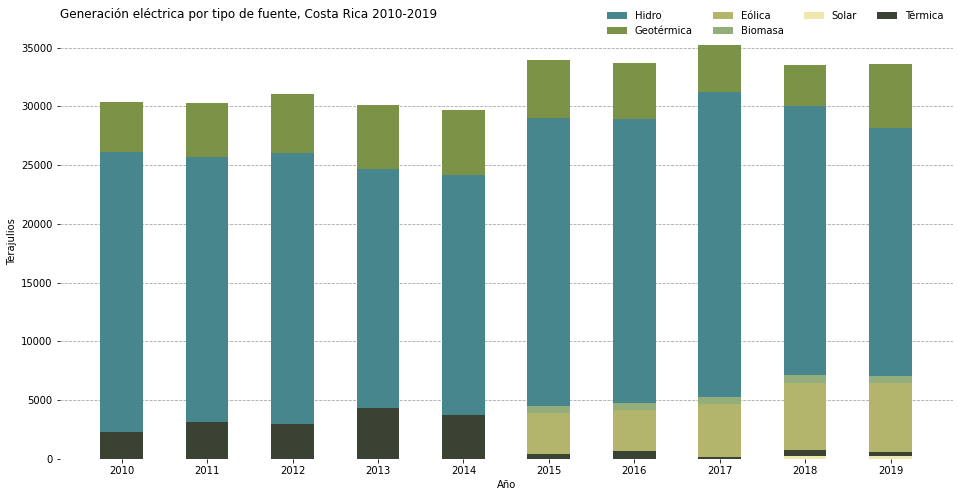

In [102]:
df_GENERACION_POR_TIPO_FUENTE = df_GENERACION_POR_TIPO_FUENTE[df_GENERACION_POR_TIPO_FUENTE['Ano']!='Total']

fig, ax = plt.subplots(1, figsize=(16, 8))

plt.bar(df_GENERACION_POR_TIPO_FUENTE.index, df_GENERACION_POR_TIPO_FUENTE['Hidro'], color = '#48868D', width =0.5)
plt.bar(df_GENERACION_POR_TIPO_FUENTE.index, df_GENERACION_POR_TIPO_FUENTE['Geotermica'], bottom = df_GENERACION_POR_TIPO_FUENTE['Hidro'], color = '#7C9247', width =0.5)

plt.bar(df_GENERACION_POR_TIPO_FUENTE.index, df_GENERACION_POR_TIPO_FUENTE['Eolica'], color = '#B2B56B', width =0.5)
plt.bar(df_GENERACION_POR_TIPO_FUENTE.index, df_GENERACION_POR_TIPO_FUENTE['Biomasa'], bottom = df_GENERACION_POR_TIPO_FUENTE['Eolica'], color = '#93AE7A', width =0.5)# x and y limits

plt.bar(df_GENERACION_POR_TIPO_FUENTE.index, df_GENERACION_POR_TIPO_FUENTE['Solar'], color = '#F0E7AD', width =0.5)
plt.bar(df_GENERACION_POR_TIPO_FUENTE.index, df_GENERACION_POR_TIPO_FUENTE['Termica'], bottom = df_GENERACION_POR_TIPO_FUENTE['Solar'], color = '#394233', width =0.5)# x and y limits

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
plt.xticks(df_GENERACION_POR_TIPO_FUENTE.index , labels = df_GENERACION_POR_TIPO_FUENTE['Ano'])
legend_label = ['Hidro', 'Geotérmica', 'Eólica', 'Biomasa', 'Solar', 'Térmica']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Generación eléctrica por tipo de fuente, Costa Rica 2010-2019', loc='left')
plt.xlabel('Año')
plt.ylabel('Terajulios')
plt.show()

Según los valores visto en esta primera tabla de la base de datos se aprecia que la producción está dada por la generación de energía eléctrica a través de la fuente hidroeléctrica, pero a su vez la producción denergía con la fuente eólica viene aumentando año tras año.

In [103]:
df_GENERACION_POR_TIPO_FUENTE

,Ano,Hidro,Geotermica,Eolica,Biomasa,Solar,Termica,Total
0,2010,26144.25,4233.89,1291.23,521.41,0.93,2308.23,34499.95
1,2011,25684.64,4606.35,1492.11,500.37,1.73,3108.03,35393.24
2,2012,26039.52,5049.18,1902.18,643.04,4.67,2989.02,36627.60
3,2013,24663.76,5460.25,1744.45,659.94,8.80,4305.59,36842.78
4,2014,24181.75,5537.29,2645.11,650.24,8.88,3755.53,36778.79
5,2015,29039.71,4952.26,3886.23,645.38,9.12,389.23,38921.94
6,2016,28893.40,4822.25,4130.25,617.42,8.69,694.89,39166.91
7,2017,31237.06,4024.20,4635.64,664.24,16.03,134.70,40711.86
8,2018,30034.43,3486.85,6475.95,625.19,201.76,570.78,41394.96
9,2019,28175.98,5445.27,6466.84,608.57,215.35,344.29,41256.29


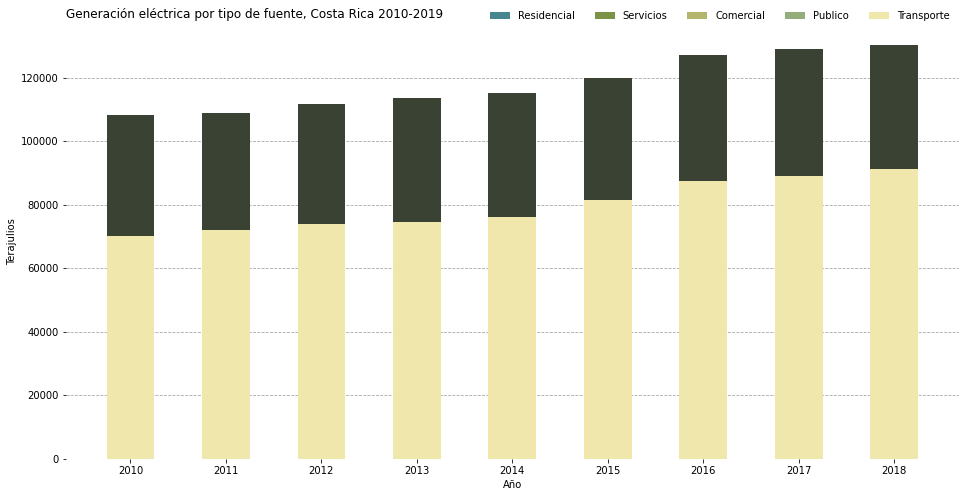

In [104]:
df__CONSUMO_FINAL_POR_SECTOR = df__CONSUMO_FINAL_POR_SECTOR[df__CONSUMO_FINAL_POR_SECTOR['ano']!='Agropecuario']

fig, ax = plt.subplots(1, figsize=(16, 8))

plt.bar(df__CONSUMO_FINAL_POR_SECTOR.index, df__CONSUMO_FINAL_POR_SECTOR['Residencial'], color = '#48868D', width =0.5)
plt.bar(df__CONSUMO_FINAL_POR_SECTOR.index, df__CONSUMO_FINAL_POR_SECTOR['Servicios'], bottom = df__CONSUMO_FINAL_POR_SECTOR['Residencial'], color = '#7C9247', width =0.5)

plt.bar(df__CONSUMO_FINAL_POR_SECTOR.index, df__CONSUMO_FINAL_POR_SECTOR['Comercial'], color = '#B2B56B', width =0.5)
plt.bar(df__CONSUMO_FINAL_POR_SECTOR.index, df__CONSUMO_FINAL_POR_SECTOR['Publico'], bottom = df__CONSUMO_FINAL_POR_SECTOR['Comercial'], color = '#93AE7A', width =0.5)# x and y limits

plt.bar(df__CONSUMO_FINAL_POR_SECTOR.index, df__CONSUMO_FINAL_POR_SECTOR['Transporte'], color = '#F0E7AD', width =0.5)
plt.bar(df__CONSUMO_FINAL_POR_SECTOR.index, df__CONSUMO_FINAL_POR_SECTOR['Industria'], bottom = df__CONSUMO_FINAL_POR_SECTOR['Transporte'], color = '#394233', width =0.5)# x and y limits

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
plt.xticks(df__CONSUMO_FINAL_POR_SECTOR.index , labels = df__CONSUMO_FINAL_POR_SECTOR['ano'])
legend_label = ['Residencial', 'Servicios', 'Comercial', 'Publico', 'Transporte']
plt.legend(legend_label, ncol = 6, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Generación eléctrica por tipo de fuente, Costa Rica 2010-2019', loc='left')
plt.xlabel('Año')
plt.ylabel('Terajulios')
plt.show()

En el gráfico anterios ahora se aprecia la contraparte, el consumo de energía a nivel pais se lo lleva el transporte, pero ¿que medios de transporte?

Analizamos las otras tablas para conocer que medios de transporte consumen más. 

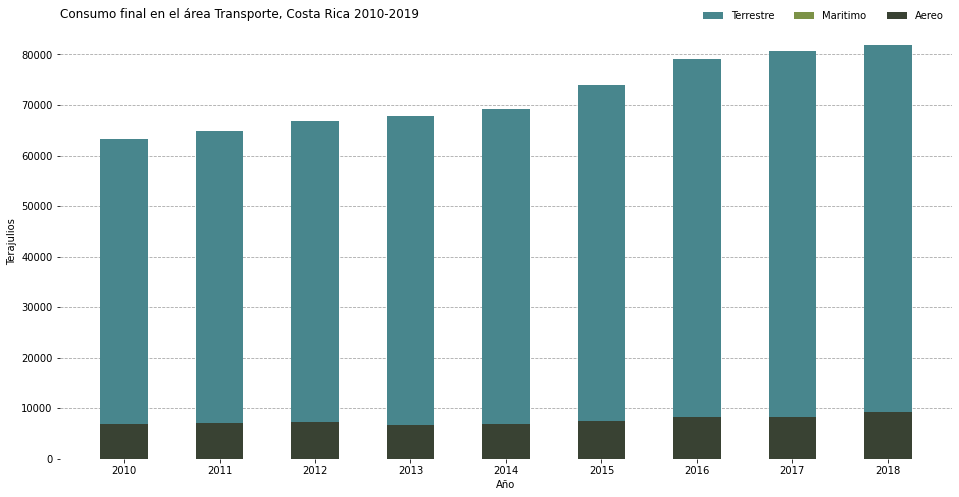

In [105]:
df_TRANSPORTE = df_TRANSPORTE[df_TRANSPORTE['Ano']!=' Aereo']

fig, ax = plt.subplots(1, figsize=(16, 8))

plt.bar(df_TRANSPORTE.index, df_TRANSPORTE['Terrestre'], color = '#48868D', width =0.5)
plt.bar(df_TRANSPORTE.index, df_TRANSPORTE['Maritimo'], bottom = df_TRANSPORTE['Maritimo'], color = '#7C9247', width =0.5)

plt.bar(df_TRANSPORTE.index, df_TRANSPORTE['Aereo'], color = '#394233', width =0.5)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
plt.xticks(df_TRANSPORTE.index , labels = df_TRANSPORTE['Ano'])
legend_label = ['Terrestre', 'Maritimo', 'Aereo']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Consumo final en el área Transporte, Costa Rica 2010-2019', loc='left')
plt.xlabel('Año')
plt.ylabel('Terajulios')
plt.show()

Se observa ahora que efecitamente el consumo energético en el área de transporte es el terrestre, el cual viene creciendo año a año.

In [106]:
df_TOTAL_ENERGY_CONSUMPTION = df_TOTAL_ENERGY_CONSUMPTION.head(6)
df_TOTAL_ENERGY_CONSUMPTION = df_TOTAL_ENERGY_CONSUMPTION[['Category', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
df_TOTAL_ENERGY_CONSUMPTION = df_TOTAL_ENERGY_CONSUMPTION.T

df_TOTAL_ENERGY_CONSUMPTION.columns = df_TOTAL_ENERGY_CONSUMPTION.iloc[0] 

df_TOTAL_ENERGY_CONSUMPTION = df_TOTAL_ENERGY_CONSUMPTION[1:]

df_TOTAL_ENERGY_CONSUMPTION = df_TOTAL_ENERGY_CONSUMPTION.reset_index()

df_TOTAL_ENERGY_CONSUMPTION = df_TOTAL_ENERGY_CONSUMPTION.rename(columns={
    'index': 'Year',
    'Consumption (quad Btu)': 'Consumption',
    'Coal (quad Btu)': 'Coal',
    'Natural gas (quad Btu)': 'Natural gas',
    'Petroleum and other liquids (quad Btu)': 'Petroleum and other liquids',
    'Nuclear, renewables, and other (quad Btu)': 'Nuclear, renewables, and other',
    'Nuclear (quad Btu)': 'Nuclear',})

df_TOTAL_ENERGY_CONSUMPTION['Renewables, and other'] = df_TOTAL_ENERGY_CONSUMPTION['Nuclear, renewables, and other'] - df_TOTAL_ENERGY_CONSUMPTION['Nuclear']

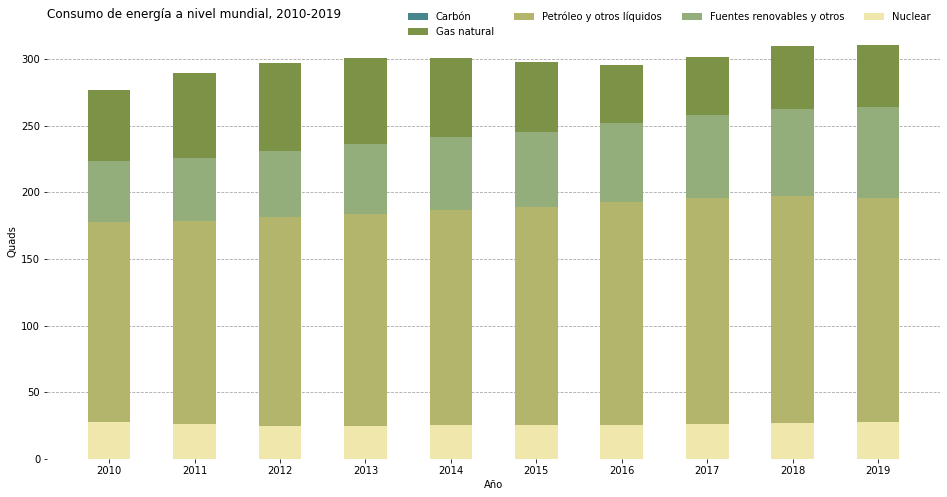

In [107]:
fig, ax = plt.subplots(1, figsize=(16, 8))

plt.bar(df_TOTAL_ENERGY_CONSUMPTION.index, df_TOTAL_ENERGY_CONSUMPTION['Coal'], color = '#48868D', width =0.5)
plt.bar(df_TOTAL_ENERGY_CONSUMPTION.index, df_TOTAL_ENERGY_CONSUMPTION['Natural gas'], bottom = df_TOTAL_ENERGY_CONSUMPTION['Coal'], color = '#7C9247', width =0.5)

plt.bar(df_TOTAL_ENERGY_CONSUMPTION.index, df_TOTAL_ENERGY_CONSUMPTION['Petroleum and other liquids'], color = '#B2B56B', width =0.5)
plt.bar(df_TOTAL_ENERGY_CONSUMPTION.index, df_TOTAL_ENERGY_CONSUMPTION['Renewables, and other'], bottom = df_TOTAL_ENERGY_CONSUMPTION['Petroleum and other liquids'], color = '#93AE7A', width =0.5)# x and y limits

plt.bar(df_TOTAL_ENERGY_CONSUMPTION.index, df_TOTAL_ENERGY_CONSUMPTION['Nuclear'], color = '#F0E7AD', width =0.5)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
plt.xticks(df_TOTAL_ENERGY_CONSUMPTION.index , labels = df_TOTAL_ENERGY_CONSUMPTION['Year'])
legend_label = ['Carbón', 'Gas natural', 'Petróleo y otros líquidos', 'Fuentes renovables y otros', 'Nuclear']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Consumo de energía a nivel mundial, 2010-2019', loc='left')
plt.xlabel('Año')
plt.ylabel('Quads')
plt.show()

In [108]:
df_TOTAL_ENERGY_PRODUCTION = df_TOTAL_ENERGY_PRODUCTION.head(6)
df_TOTAL_ENERGY_PRODUCTION = df_TOTAL_ENERGY_PRODUCTION[['Category', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
df_TOTAL_ENERGY_PRODUCTION = df_TOTAL_ENERGY_PRODUCTION.T

df_TOTAL_ENERGY_PRODUCTION.columns = df_TOTAL_ENERGY_PRODUCTION.iloc[0] 

df_TOTAL_ENERGY_PRODUCTION = df_TOTAL_ENERGY_PRODUCTION[1:]

df_TOTAL_ENERGY_PRODUCTION = df_TOTAL_ENERGY_PRODUCTION.reset_index()

df_TOTAL_ENERGY_PRODUCTION = df_TOTAL_ENERGY_PRODUCTION.rename(columns={
    'index': 'Year',
    'Production (quad Btu)': 'Production',
    'Coal (quad Btu)': 'Coal',
    'Natural gas (quad Btu)': 'Natural gas',
    'Petroleum and other liquids (quad Btu)': 'Petroleum and other liquids',
    'Nuclear, renewables, and other (quad Btu)': 'Nuclear, renewables, and other',
    'Nuclear (quad Btu)': 'Nuclear',})

df_TOTAL_ENERGY_PRODUCTION['Renewables, and other'] = df_TOTAL_ENERGY_PRODUCTION['Nuclear, renewables, and other'] - df_TOTAL_ENERGY_PRODUCTION['Nuclear']
df_TOTAL_ENERGY_PRODUCTION

Category,Year,Production,Coal,Natural gas,Petroleum and other liquids,"Nuclear, renewables, and other",Nuclear,"Renewables, and other"
0,2010,518.731657,156.210012,116.945679,171.408876,74.167091,27.379918,46.787173
1,2011,534.187873,164.666096,121.002643,173.447412,75.071722,26.247553,48.824169
2,2012,546.333605,169.225246,123.533191,178.219785,75.355384,24.474109,50.881275
3,2013,554.177553,171.897851,125.031915,177.971089,79.276699,24.651921,54.624777
4,2014,563.331242,171.426576,126.990053,182.658624,82.25599,25.138315,57.117674
5,2015,568.558292,167.602751,129.644515,187.83561,83.475416,25.437528,58.037888
6,2016,564.580276,157.777584,130.876105,188.79854,87.128047,25.712197,61.41585
7,2017,578.245254,162.088377,136.850601,188.73706,90.569217,25.898281,64.670935
8,2018,600.728729,168.307735,144.439144,193.050893,94.930957,26.513244,68.417714
9,2019,611.508969,171.840424,149.401589,192.134558,98.132398,27.659891,70.472507


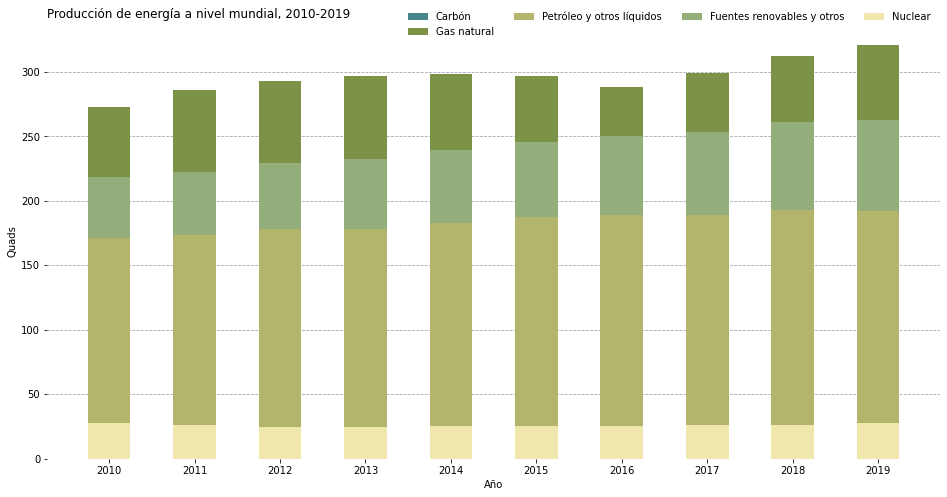

In [109]:
fig, ax = plt.subplots(1, figsize=(16, 8))

plt.bar(df_TOTAL_ENERGY_PRODUCTION.index, df_TOTAL_ENERGY_PRODUCTION['Coal'], color = '#48868D', width =0.5)
plt.bar(df_TOTAL_ENERGY_PRODUCTION.index, df_TOTAL_ENERGY_PRODUCTION['Natural gas'], bottom = df_TOTAL_ENERGY_PRODUCTION['Coal'], color = '#7C9247', width =0.5)

plt.bar(df_TOTAL_ENERGY_PRODUCTION.index, df_TOTAL_ENERGY_PRODUCTION['Petroleum and other liquids'], color = '#B2B56B', width =0.5)
plt.bar(df_TOTAL_ENERGY_PRODUCTION.index, df_TOTAL_ENERGY_PRODUCTION['Renewables, and other'], bottom = df_TOTAL_ENERGY_PRODUCTION['Petroleum and other liquids'], color = '#93AE7A', width =0.5)# x and y limits

plt.bar(df_TOTAL_ENERGY_PRODUCTION.index, df_TOTAL_ENERGY_PRODUCTION['Nuclear'], color = '#F0E7AD', width =0.5)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
plt.xticks(df_TOTAL_ENERGY_PRODUCTION.index , labels = df_TOTAL_ENERGY_PRODUCTION['Year'])
legend_label = ['Carbón', 'Gas natural', 'Petróleo y otros líquidos', 'Fuentes renovables y otros', 'Nuclear']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('Producción de energía a nivel mundial, 2010-2019', loc='left')
plt.xlabel('Año')
plt.ylabel('Quads')
plt.show()

Vemos como a nivel mundial la producción de energía es variado entre petorleos y otros líquidos, pero siendo CR un referente en la producción con energia de fuentes renovables.

<h2>Conclusiones</h2>

*   Costa Rica, contrario a la tendencia mundial, produjo casi la totalidad de su energía a partir de fuentes sostenibles.
* Costa Rica aumento su producción de energía.
*   Al igual que pasa a nivel global, Costa Rica presento una tendencia al alza en el consumo de energía en todos sus sectores. 
*   La energía geotérmica fue la fuente de producción más importante para Costa Rica, no obstante, otras fuentes como la eólica y la solar presentaron un fuerte incremento en su relevancia.
*   Los hidrocarburos formaron la mayor fuente de energía utilizada en Costa Rica.
*  Acorde con la tendencia global, el sector transporte presento el sector más relevante en cuanto a consumo de energía, con una tendencia al alza.
* La mayor parte de la energía consumida en Costa Rica fue importada.
* Las importaciones de energía en Costa Rica presentaron una tendencia al alza.
* Dentro del sector transporte, el terrestre fue el que más energía empleó en Costa Rica.
* Al igual que pasa en el resto del mundo, en Costa Rica el sector de consumo más grande dentro de la categoría residencial fue el urbano.

Como se puede observar, Costa Rica ha resaltado a nivel mundial por la proporción de energías que produce. No obstante, en el consumo siguió las mismas tendencias que el resto del mundo, haciendo un fuerte uso de hidrocarburos. Lo anterior presenta una serie de problemáticas para este país, las cuales, con el fin de tener un desarrollo sostenible, deben ser con vehemencia y desde los diferentes sectores de la sociedad